In [14]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
#calibrated (subtracted mean) profile txt created from notebook J0332+5434
prof = np.loadtxt('../J0332_profile.txt')
nprofs = len(prof)

In [53]:
#create 2D array of the cumulative sums
cdf = np.ones_like(prof)

for i in range(nprofs):
    #we have negative values from when we calibrated, so take abs value. Is this VALID?
    cumsum = np.cumsum(np.abs(prof[i]))
    #normalize for cdf
    cdf[i] = cumsum / np.sum(cumsum)

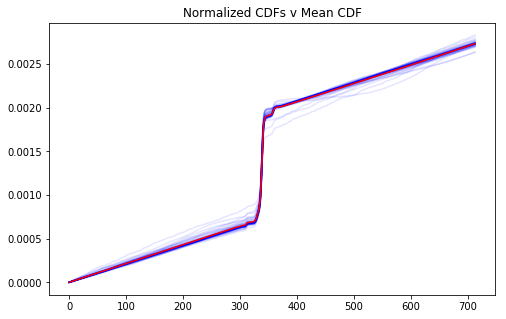

In [67]:
#calculate average cdf to perform ks_test against it
mean_cdf = np.average(cdf, axis=0)

plt.figure(figsize = (8,5))
for i in range(nprofs):
    plt.plot(cdf[i], alpha=.1, color = 'b')

plt.plot(mean_cdf, 'r')
plt.title('Normalized CDFs v Mean CDF')
plt.show()

In [69]:
#save null_distr (average of the cdfs) and empirical distribution (cdf of each profile)
#to perform ks test using R
np.savetxt('../R_analysis/null_distr.txt', mean_cdf)
np.savetxt('../R_analysis/empirical_distr.txt', cdf)

In [71]:
#read in p values from KS test
ks_result = np.loadtxt('../R_analysis/ks_results.txt')

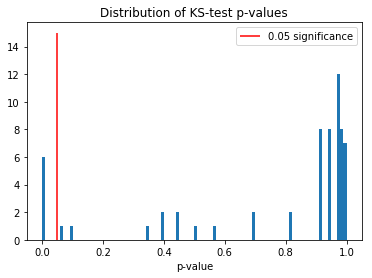

In [136]:
alpha = .05

plt.hist(ks_result, bins=100)
plt.vlines(x = alpha, ymin = 0, ymax = 15, label = "%s significance" %alpha, color = 'r')
plt.legend(loc=1)
plt.title("Distribution of KS-test p-values")
plt.xlabel("p-value")
plt.show()

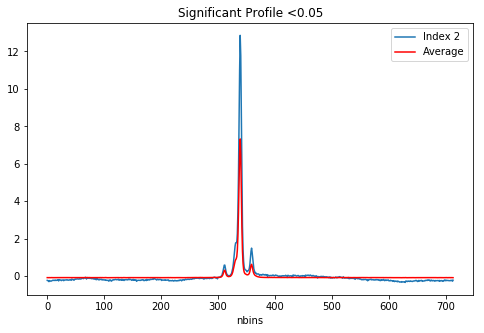

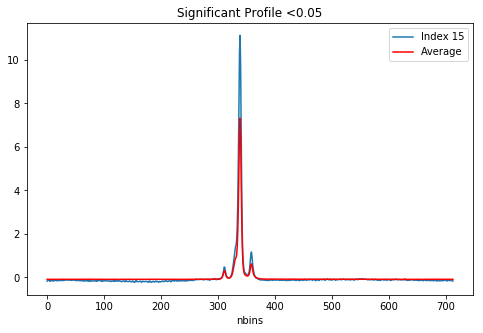

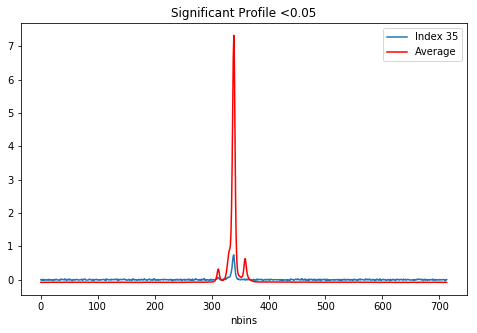

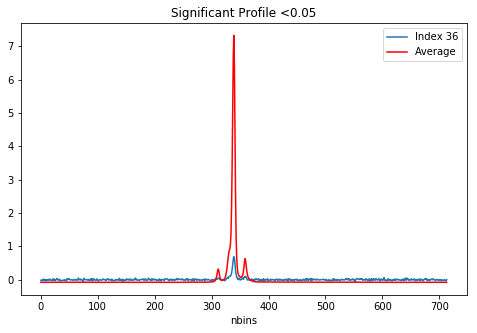

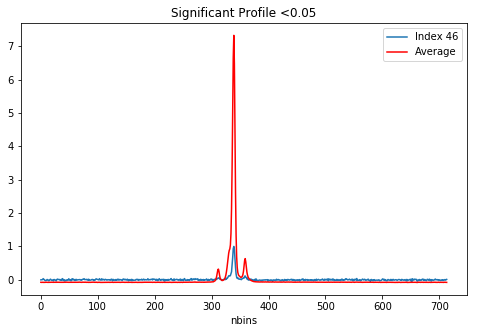

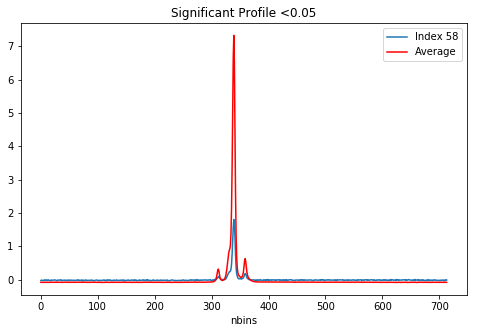

In [137]:
#extract profiles which has significance < .05
#ie reject null hypothesis that the data and null distr were drawn from same distribution
mask = [ks_result < alpha]
sig_profs = prof[mask]
sig_ind = np.arange(nprofs)[mask] #indexes of significant profiles

for i in range(len(sig_profs)):
    plt.figure(figsize = (8,5))
    plt.plot(sig_profs[i], label = 'Index %d' %sig_ind[i])
    plt.plot(np.average(prof, axis=0), 'r', label = 'Average')
    plt.title("Significant Profile <%s" %alpha)
    plt.xlabel("nbins")
    plt.legend()
    plt.show()